In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

In [2]:
stld = yf.download('STLD',period='5y',progress=False)
stld['Returns'] = np.log(stld['Adj Close'] / stld['Adj Close'].shift(1))
stld = stld[['Adj Close','Returns']].dropna()

# Downloading Stock data and getting the log returns using the yfinance library. The hope here is that using log 
# returns to standardize the data is enough to make the data fit a normal distribution.

mean = np.mean(stld['Returns'])
deviation = np.std(stld['Returns'])
price = stld['Adj Close'].iloc[-1]

# Calculating the mean, standard deviation, and most recent stock price.

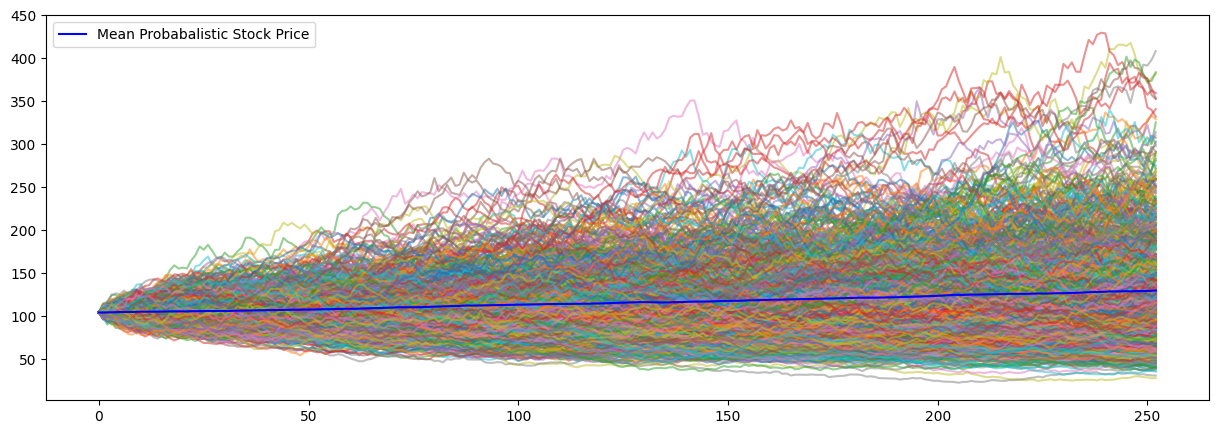

Monte Carlo simulated price in one year: $129.72


In [3]:
num_of_simulations = 1000

def stock_monte_carlo(S0,mu,sigma,n=252): #N is the number of days into the future
    np.random.seed(42)
    
    result = []

    for _ in range(num_of_simulations):
        
        prices = [S0]
        for _ in range(n):
            # A formula for price, day by day
            stock_price = prices[-1] * np.exp((mu - 0.5 * sigma ** 2) + \
                                              sigma * np.random.normal())
            prices.append(stock_price)
        
        result.append(prices)
    
    simulation_data = pd.DataFrame(result).T
    simulation_data['Mean'] = simulation_data.mean(axis=1)

    # Here I am calculating the mean of all of the predictions, day by day. From here, we come up with
    # the most probabalistic stock price for each day. I will use this, along with other price
    # valuations in my stock analysis for investments class.

    plt.figure(figsize=(15,5))
    plt.plot(simulation_data[simulation_data.columns[:-1]], alpha=0.5)
    plt.plot(simulation_data['Mean'],color='blue',label = 'Mean Probabalistic Stock Price')
    plt.legend()
    plt.show()

    print(f'Monte Carlo simulated price in one year: ${round(simulation_data["Mean"].iloc[-1],2)}')

if __name__ == '__main__':
    stock_monte_carlo(S0=price,mu=mean,sigma=deviation)

In [4]:
def calculate_var_n(position, c, mu, sigma, n):
    var = position * (mu * n - sigma * np.sqrt(n) * norm.ppf(1-c))
    return var

print(f'Maximum expected loss N DAYS within a 95% confidence interval: \
      {round(calculate_var_n(100,c=0.95,mu=mean,sigma=deviation,n=1),2)}%')

# This is a quick value-at-risk calculation for 1 day into the future. 
# Given 95% confidence, we do not expect portfolio losses to exceed 4.74% when investing into
# Steel Dynamics.

Maximum expected loss N DAYS within a 95% confidence interval:       4.74%
